In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 22.0 MB/s eta 0:00:00


In [ ]:
import rioxarray as rio
import rasterio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. DATOS**

## **1.1. Evaporación**

In [ ]:
raster_evaporacion = '/content/drive/MyDrive/TecnicasModelacion/Evap202312.tif'

try:
  with rasterio.open(raster_evaporacion) as src:
    array_evap = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_evap.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_evaporacion}'. Por favor revise la ruta del archivo.")


forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


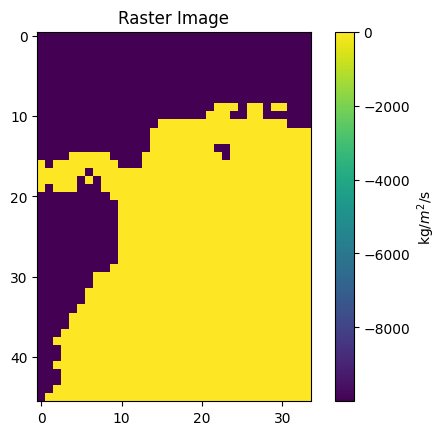

In [ ]:
plt.imshow(array_evap, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='kg/$m^2$/s')  # Add a colorbar
plt.title('Raster Image')
plt.show()

In [ ]:
filas, columnas = np.indices(array_evap.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_evap = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'evaporacion': array_evap.flatten()})

df_evap.head()

,x,y,evaporacion
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_evap_filtered = df_evap[df_evap['evaporacion'] != -9999.0]
df_evap_filtered

,x,y,evaporacion
328,-71.977587,12.071149,0.000009
329,-71.528429,12.071149,0.000011
330,-71.079272,12.071149,0.000010
332,-70.180957,12.071149,0.000017
333,-69.731799,12.071149,0.000021
...,...,...,...
1559,-68.833484,-4.098526,0.000050
1560,-68.384326,-4.098526,0.000047
1561,-67.935168,-4.098526,0.000046
1562,-67.486011,-4.098526,0.000045


In [ ]:
df_evap_filtered.describe()

,x,y,evaporacion
count,961.000000,961.000000,9.610000e+02
mean,-73.104921,3.135670,4.093178e-05
std,3.804003,4.592238,1.112312e-05
min,-81.859055,-4.098526,2.433364e-07
25%,-76.020006,-0.954423,3.807065e-05
50%,-72.875902,2.638839,4.376617e-05
75%,-69.731799,7.130415,4.728790e-05
max,-67.036853,12.071149,6.307939e-05


In [ ]:
evaporacion = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Evap.nc')

x_2d = x.reshape(array_evap.shape)
y_2d = y.reshape(array_evap.shape)
evaporacion = evaporacion.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
evaporacion['evaporacion'] = (('y', 'x'), array_evap)
evaporacion

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 492, y: 46, x: 34)
Coordinates:
    x            (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.49 -67.04
    y            (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band         (time, y, x) float32 3MB ...
    evaporacion  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 4.528e-05

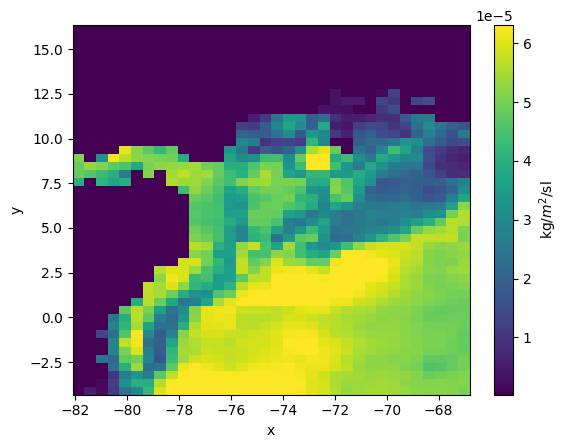

In [ ]:
evaporacion.clip(2.433364e-07,6.307939e-05).band[0].plot(cbar_kwargs={'label': "kg/$m^2$/s"})

## **1.2. Humedad específica**

In [ ]:
raster_humedadE = '/content/drive/MyDrive/TecnicasModelacion/Hesp202312.tif'

try:
  with rasterio.open(raster_humedadE) as src:
    array_hesp = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_hesp.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_humedadE}'. Por favor revise la ruta del archivo.")


forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


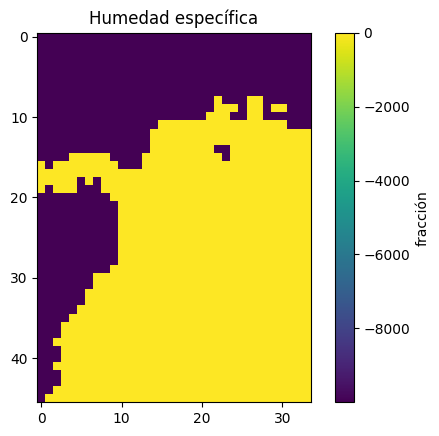

In [ ]:
plt.imshow(array_hesp, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='fracción')  # Add a colorbar
plt.title('Humedad específica')
plt.show()

In [ ]:
filas, columnas = np.indices(array_hesp.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_hesp = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'humedad_esp': array_hesp.flatten()})

df_hesp.head()

,x,y,humedad_esp
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_hesp_filtered = df_hesp[df_hesp['humedad_esp'] != -9999.0]
df_hesp_filtered

,x,y,humedad_esp
294,-71.977587,12.520307,0.018062
298,-70.180957,12.520307,0.017715
299,-69.731799,12.520307,0.017641
328,-71.977587,12.071149,0.017526
329,-71.528429,12.071149,0.017502
...,...,...,...
1559,-68.833484,-4.098526,0.019314
1560,-68.384326,-4.098526,0.019493
1561,-67.935168,-4.098526,0.019687
1562,-67.486011,-4.098526,0.019719


In [ ]:
df_hesp_filtered.describe()

,x,y,humedad_esp
count,966.000000,966.000000,966.000000
mean,-73.111175,3.167041,0.017348
std,3.809499,4.614361,0.002597
min,-81.859055,-4.098526,0.008212
25%,-76.020006,-0.954423,0.015865
50%,-72.875902,2.638839,0.018280
75%,-69.731799,7.130415,0.019398
max,-67.036853,12.520307,0.021010


In [ ]:
humedadEspecifica = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Hesp.nc')
x_2d = x.reshape(array_hesp.shape)
y_2d = y.reshape(array_hesp.shape)
humedadEspecifica = humedadEspecifica.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
humedadEspecifica['humedad_especifica'] = (('y', 'x'), array_evap)

humedadEspecifica

<xarray.Dataset> Size: 3MB
Dimensions:             (time: 492, y: 46, x: 34)
Coordinates:
    x                   (y, x) float64 13kB -81.86 -81.41 ... -67.49 -67.04
    y                   (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band                (time, y, x) float32 3MB ...
    humedad_especifica  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 4.528e-05

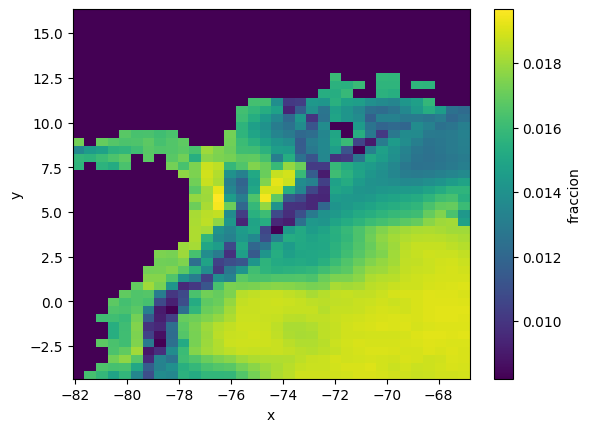

In [ ]:
humedadEspecifica.band[0].clip(0.008212,0.021010).plot(cbar_kwargs={'label':'fraccion'})

## **1.3. Precipitación**

In [ ]:
raster_prec = '/content/drive/MyDrive/TecnicasModelacion/Prec202312.tif'

try:
  with rasterio.open(raster_prec) as src:
    array_prec = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_prec.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_prec}'. Por favor revise la ruta del archivo.")

forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


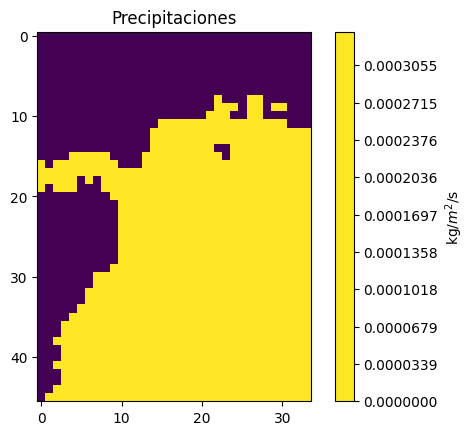

In [ ]:
plt.imshow(array_prec, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='kg/$m^2$/s', boundaries=np.linspace(0,0.000336,100))  # Add a colorbar
plt.title('Precipitaciones')
plt.show()

In [ ]:
filas, columnas = np.indices(array_prec.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_prec = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'precipitaciones': array_prec.flatten()})

df_prec.head()

,x,y,precipitaciones
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_prec_filtered = df_prec[df_prec['precipitaciones'] != -9999.0]
df_prec_filtered

,x,y,precipitaciones
294,-71.977587,12.520307,0.000008
298,-70.180957,12.520307,0.000010
299,-69.731799,12.520307,0.000010
328,-71.977587,12.071149,0.000003
329,-71.528429,12.071149,0.000006
...,...,...,...
1559,-68.833484,-4.098526,0.000135
1560,-68.384326,-4.098526,0.000157
1561,-67.935168,-4.098526,0.000160
1562,-67.486011,-4.098526,0.000145


In [ ]:
df_prec_filtered.describe()

,x,y,precipitaciones
count,966.000000,966.000000,966.000000
mean,-73.111175,3.167041,0.000067
std,3.809499,4.614361,0.000051
min,-81.859055,-4.098526,0.000000
25%,-76.020006,-0.954423,0.000023
50%,-72.875902,2.638839,0.000063
75%,-69.731799,7.130415,0.000097
max,-67.036853,12.520307,0.000336


In [ ]:
precipitacion = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Prec.nc')
#precipitacion = precipitacion.rio.write_crs("epsg:4326")
x_2d = x.reshape(array_prec.shape)
y_2d = y.reshape(array_prec.shape)
precipitacion = precipitacion.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
precipitacion['precipitaciones'] = (('y', 'x'), array_prec)
precipitacion


<xarray.Dataset> Size: 3MB
Dimensions:          (time: 492, y: 46, x: 34)
Coordinates:
    x                (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.49 -67.04
    y                (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band             (time, y, x) float32 3MB ...
    precipitaciones  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 0.0001236

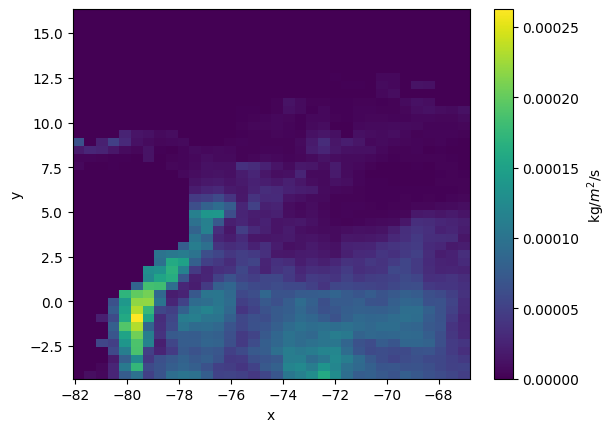

In [ ]:
precipitacion.clip(0,0.000336).band[0].plot(cbar_kwargs={'label':'kg/$m^2$/s'})

## **1.4. Presión**

In [ ]:
raster_presion = '/content/drive/MyDrive/TecnicasModelacion/Presion202312.tif'

try:
  with rasterio.open(raster_presion) as src:
    array_presion = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_presion.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_presion}'. Por favor revise la ruta del archivo.")

forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


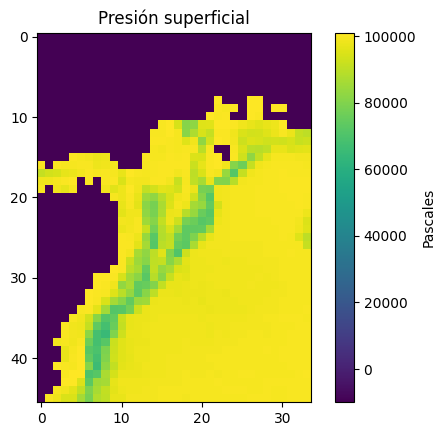

In [ ]:
plt.imshow(array_presion, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='Pascales')  # Add a colorbar
plt.title('Presión superficial')
plt.show()

In [ ]:
filas, columnas = np.indices(array_presion.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_presion = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'presiones': array_presion.flatten()})

df_presion.head()

,x,y,presiones
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_presion_filtered = df_presion[df_presion['presiones'] != -9999.0]
df_presion_filtered

,x,y,presiones
294,-71.977587,12.520307,101020.968750
298,-70.180957,12.520307,100989.156250
299,-69.731799,12.520307,100816.539062
328,-71.977587,12.071149,100305.046875
329,-71.528429,12.071149,99572.203125
...,...,...,...
1559,-68.833484,-4.098526,99472.593750
1560,-68.384326,-4.098526,99528.882812
1561,-67.935168,-4.098526,99832.265625
1562,-67.486011,-4.098526,99882.023438


In [ ]:
df_presion_filtered.describe()

,x,y,presiones
count,966.000000,966.000000,966.000000
mean,-73.111175,3.167041,95970.929688
std,3.809499,4.614361,7055.252441
min,-81.859055,-4.098526,65297.546875
25%,-76.020006,-0.954423,96826.285156
50%,-72.875902,2.638839,98903.925781
75%,-69.731799,7.130415,99663.583984
max,-67.036853,12.520307,101020.968750


In [ ]:
presion = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Presion.nc')
x_2d = x.reshape(array_presion.shape)
y_2d = y.reshape(array_presion.shape)
presion = presion.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
presion['presiones'] = (('y', 'x'), array_presion)
presion

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 492, y: 46, x: 34)
Coordinates:
    x          (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.94 -67.49 -67.04
    y          (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band       (time, y, x) float32 3MB ...
    presiones  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 9.988e+04 9.983e+04

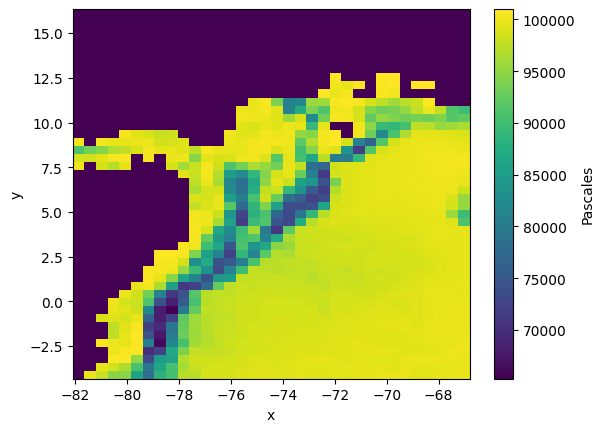

In [ ]:
presion.band[0].clip(65297,101020).plot(cbar_kwargs={'label':'Pascales'})

## **1.5. Humedad del suelo**

In [ ]:
raster_suelo = '/content/drive/MyDrive/TecnicasModelacion/Suelo202312.tif'

try:
  with rasterio.open(raster_suelo) as src:
    array_suelo = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_prec.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_suelo}'. Por favor revise la ruta del archivo.")

forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


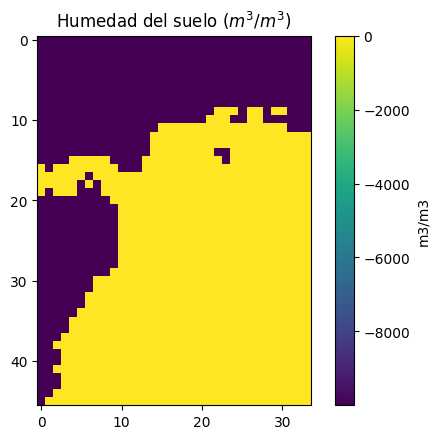

In [ ]:
plt.imshow(array_suelo, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='m3/m3')  # Add a colorbar
plt.title('Humedad del suelo ($m^3/m^3$)')
plt.show()

In [ ]:
filas, columnas = np.indices(array_suelo.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_suelo = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'humedad suelo': array_suelo.flatten()})

df_suelo.head()

,x,y,humedad suelo
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_suelo_filtered = df_suelo[df_suelo['humedad suelo'] != -9999.0]
df_suelo_filtered

,x,y,humedad suelo
328,-71.977587,12.071149,0.198730
329,-71.528429,12.071149,0.207679
330,-71.079272,12.071149,0.203357
332,-70.180957,12.071149,0.240006
333,-69.731799,12.071149,0.239391
...,...,...,...
1559,-68.833484,-4.098526,0.415209
1560,-68.384326,-4.098526,0.420711
1561,-67.935168,-4.098526,0.422956
1562,-67.486011,-4.098526,0.425531


In [ ]:
df_suelo_filtered.describe()

,x,y,humedad suelo
count,961.000000,961.000000,961.000000
mean,-73.104921,3.135670,0.374829
std,3.804003,4.592238,0.070444
min,-81.859055,-4.098526,0.142697
25%,-76.020006,-0.954423,0.348922
50%,-72.875902,2.638839,0.409460
75%,-69.731799,7.130415,0.425176
max,-67.036853,12.071149,0.433775


In [ ]:
suelo = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Suelo.nc')
x_2d = x.reshape(array_suelo.shape)
y_2d = y.reshape(array_suelo.shape)
suelo = suelo.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
suelo['humedad suelo'] = (('y', 'x'), array_suelo)
suelo

<xarray.Dataset> Size: 3MB
Dimensions:        (time: 492, y: 46, x: 34)
Coordinates:
    x              (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.49 -67.04
    y              (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band           (time, y, x) float32 3MB ...
    humedad suelo  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 0.4255 0.4229

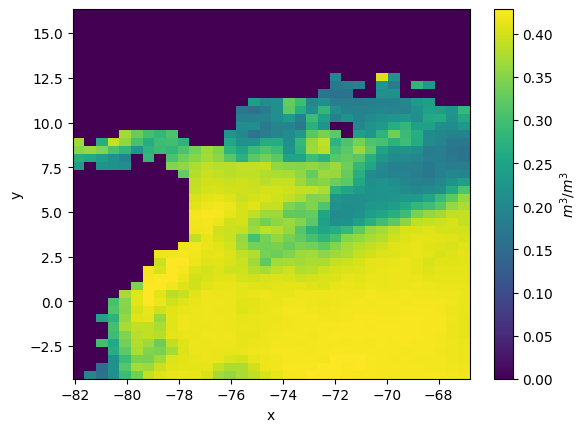

In [ ]:
suelo.band[0].clip(0,1).plot(cbar_kwargs={'label':'$m^3/m^3$'})

## **1.6. Temperatura**

In [ ]:
raster_temperatura = '/content/drive/MyDrive/TecnicasModelacion/Tair202312.tif'

try:
  with rasterio.open(raster_temperatura) as src:
    array_temperatura = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_temperatura.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_temperatura}'. Por favor revise la ruta del archivo.")

forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


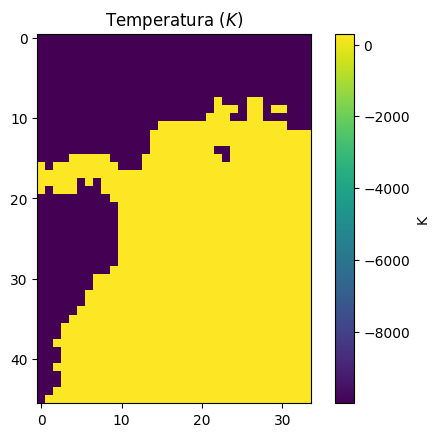

In [ ]:
plt.imshow(array_temperatura, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='K')  # Add a colorbar
plt.title('Temperatura ($K$)')
plt.show()

In [ ]:
filas, columnas = np.indices(array_temperatura.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_temperatura = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'temperatura': array_temperatura.flatten()})

df_temperatura.head()

,x,y,temperatura
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_temperatura_filtered = df_temperatura[df_temperatura['temperatura'] != -9999.0]
df_temperatura_filtered

,x,y,temperatura
294,-71.977587,12.520307,300.585785
298,-70.180957,12.520307,300.793304
299,-69.731799,12.520307,300.707397
328,-71.977587,12.071149,300.418884
329,-71.528429,12.071149,299.810394
...,...,...,...
1559,-68.833484,-4.098526,299.746399
1560,-68.384326,-4.098526,299.557983
1561,-67.935168,-4.098526,299.724670
1562,-67.486011,-4.098526,299.780182


In [ ]:
df_temperatura_filtered.describe()

,x,y,temperatura
count,966.000000,966.000000,966.000000
mean,-73.111175,3.167041,298.349243
std,3.809499,4.614361,4.023401
min,-81.859055,-4.098526,279.451752
25%,-76.020006,-0.954423,298.439407
50%,-72.875902,2.638839,299.453384
75%,-69.731799,7.130415,300.162552
max,-67.036853,12.520307,303.566010


In [ ]:
temperatura = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Tair.nc')
x_2d = x.reshape(array_temperatura.shape)
y_2d = y.reshape(array_temperatura.shape)
temperatura = temperatura.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
temperatura['temperatura'] = (('y', 'x'), array_temperatura)
temperatura

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 492, y: 46, x: 34)
Coordinates:
    x            (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.49 -67.04
    y            (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band         (time, y, x) float32 3MB ...
    temperatura  (y, x) float32 6kB -9.999e+03 -9.999e+03 ... 299.8 299.8

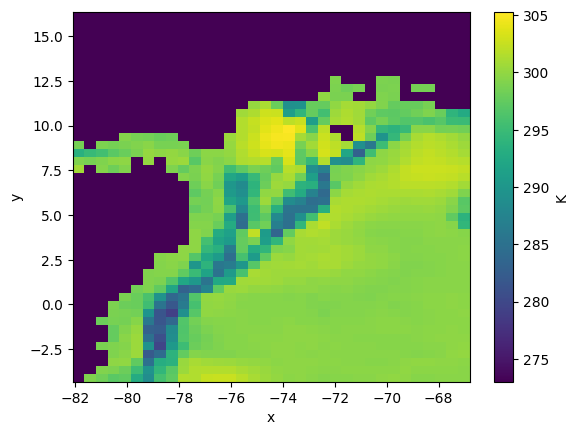

In [ ]:
temperatura.band[0].clip(273,315).plot(cbar_kwargs={'label':'K'})

## **1.7. Velocidad del viento**

In [ ]:
raster_viento = '/content/drive/MyDrive/TecnicasModelacion/Viento202312.tif'

try:
  with rasterio.open(raster_viento) as src:
    array_viento = src.read(1) # Assuming you want the first band
    print("forma del ráster:", array_viento.shape)
    print("CRS:", src.crs)
    print("Transform:", src.transform)
except rasterio.errors.RasterioIOError as e:
    print(f"Error: no se pudo abrir el archivo ráster '{raster_viento}'. Por favor revise la ruta del archivo.")

forma del ráster: (46, 34)
CRS: EPSG:4326
Transform: | 0.45, 0.00,-82.08|
| 0.00,-0.45, 16.34|
| 0.00, 0.00, 1.00|


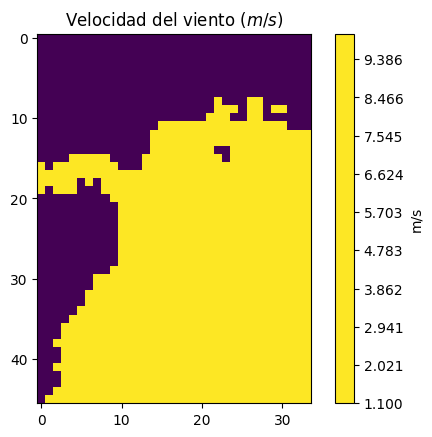

In [ ]:
plt.imshow(array_viento, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='m/s',boundaries=np.linspace(1.1,10,30))  # Add a colorbar
plt.title('Velocidad del viento ($m/s$)')
plt.show()

In [ ]:
filas, columnas = np.indices(array_viento.shape)
x, y = rasterio.transform.xy(src.transform, filas, columnas)

df_viento = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'viento': array_viento.flatten()})

df_viento.head()

,x,y,viento
0,-81.859055,16.113568,-9999.0
1,-81.409898,16.113568,-9999.0
2,-80.960740,16.113568,-9999.0
3,-80.511582,16.113568,-9999.0
4,-80.062425,16.113568,-9999.0


In [ ]:
df_viento_filtered = df_viento[df_viento['viento'] != -9999.0]
df_viento_filtered

,x,y,viento
294,-71.977587,12.520307,9.724394
298,-70.180957,12.520307,9.761177
299,-69.731799,12.520307,9.701023
328,-71.977587,12.071149,9.653481
329,-71.528429,12.071149,9.930340
...,...,...,...
1559,-68.833484,-4.098526,1.503819
1560,-68.384326,-4.098526,1.460830
1561,-67.935168,-4.098526,1.420396
1562,-67.486011,-4.098526,1.404625


In [ ]:
df_viento_filtered.describe()

,x,y,viento
count,966.000000,966.000000,966.000000
mean,-73.111175,3.167041,2.773944
std,3.809499,4.614361,1.671778
min,-81.859055,-4.098526,1.175895
25%,-76.020006,-0.954423,1.470502
50%,-72.875902,2.638839,2.163462
75%,-69.731799,7.130415,3.594759
max,-67.036853,12.520307,10.078519


In [ ]:
viento = xr.open_dataset('/content/drive/MyDrive/TecnicasModelacion/Viento.nc')
x_2d = x.reshape(array_viento.shape)
y_2d = y.reshape(array_viento.shape)
viento = viento.assign_coords({"x": (("y", "x"), x_2d), "y": (("y", "x"), y_2d)})
viento['viento'] = (('y', 'x'), array_viento)
viento

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 492, y: 46, x: 34)
Coordinates:
    x        (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.94 -67.49 -67.04
    y        (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099 -4.099
Dimensions without coordinates: time
Data variables:
    band     (time, y, x) float32 3MB ...
    viento   (y, x) float32 6kB -9.999e+03 -9.999e+03 -9.999e+03 ... 1.405 1.405

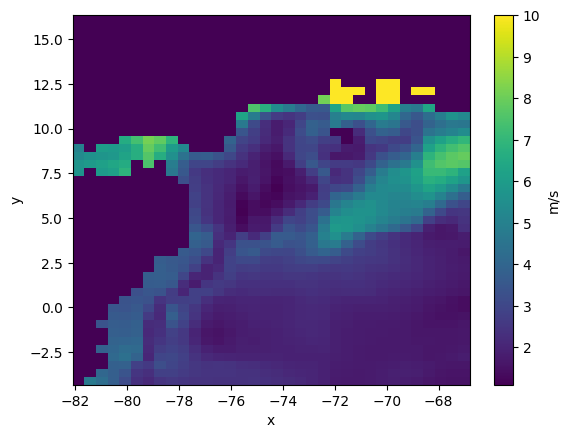

In [ ]:
viento.band[0].clip(1.1,10).plot(cbar_kwargs={'label':'m/s'})

# **2. MODELO DE EVAPORACION Y PRECIPITACIÓN - MODELO RLS**

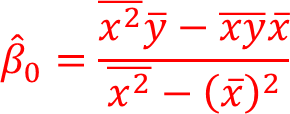

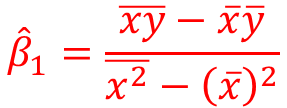

## **2.1. MODELO RLS N°1**

In [ ]:
# x: evaporación
# y: precipitación
precipitacion_promedio = precipitacion.mean(dim='time') # Y PROMEDIO

In [ ]:
evaporacion_promedio = evaporacion.mean(dim='time') # X PROMEDIO

In [ ]:
evaporacion_promedio_2 = evaporacion_promedio**2 # (X PROMEDIO)^2

In [ ]:
evapXprec_promedio = (evaporacion*precipitacion).mean(dim='time') # (X*Y) PROMEDIO

In [ ]:
evap_2_promedio = (evaporacion**2).mean(dim='time') # (X^2) PROMEDIO

In [ ]:
BETA_0 = (evap_2_promedio*precipitacion_promedio - evapXprec_promedio*evaporacion_promedio)/(evap_2_promedio - evaporacion_promedio_2)

In [ ]:
BETA_1 = (evapXprec_promedio-evaporacion_promedio*precipitacion_promedio)/(evap_2_promedio - evaporacion_promedio_2)

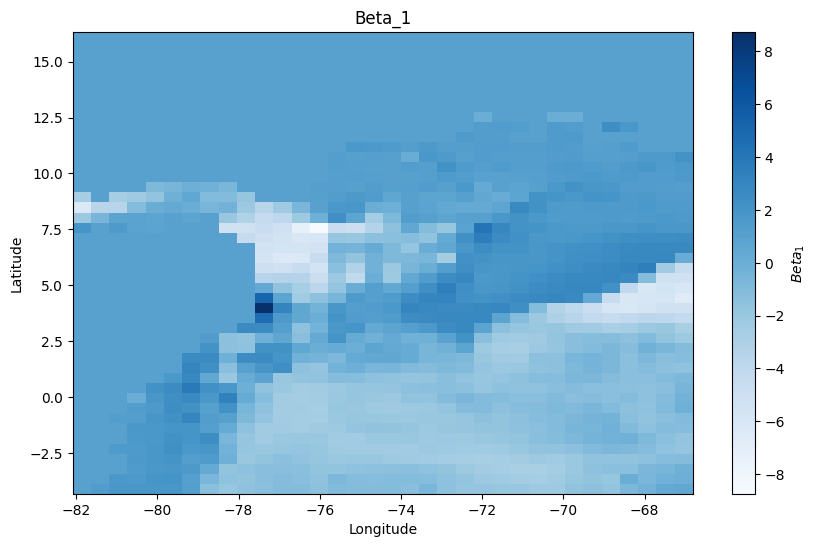

In [ ]:
plt.figure(figsize=(10, 6))
im = BETA_1.band.plot(cmap='Blues', cbar_kwargs={'label':'$Beta_1$'})
plt.title('Beta_1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# exporta BETA_1
BETA_1 = BETA_1.assign_coords({"x": BETA_1.x[0, :], "y": BETA_1.y[:, 0]})

BETA_1.rio.to_raster('/content/drive/MyDrive/TecnicasModelacion/BETA_1.tif')

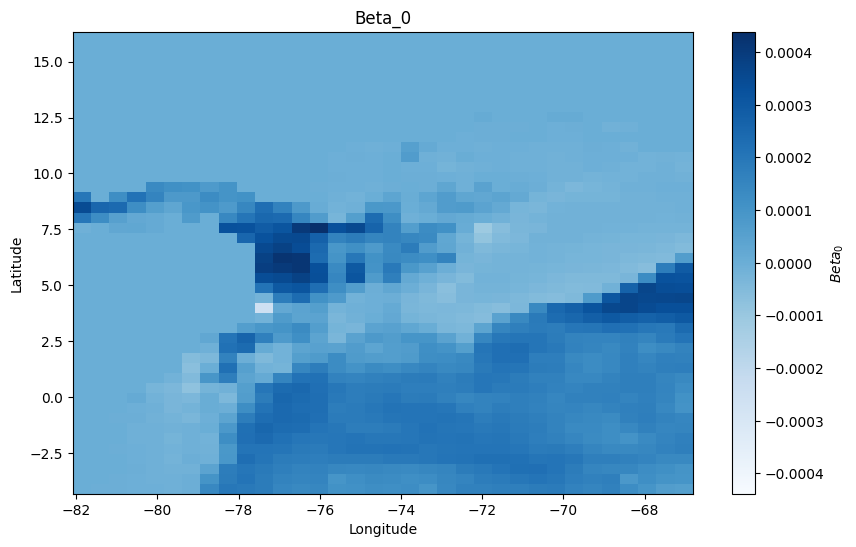

In [ ]:
plt.figure(figsize=(10, 6))
im = BETA_0.band.plot(cmap='Blues',cbar_kwargs={'label':'$Beta_0$'})
plt.title('Beta_0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# exporta BETA_0
BETA_0 = BETA_0.assign_coords({"x": BETA_0.x[0, :], "y": BETA_0.y[:, 0]})

BETA_0.rio.to_raster('/content/drive/MyDrive/TecnicasModelacion/BETA_0.tif')

## **2.2. Probar modelo de RLS**

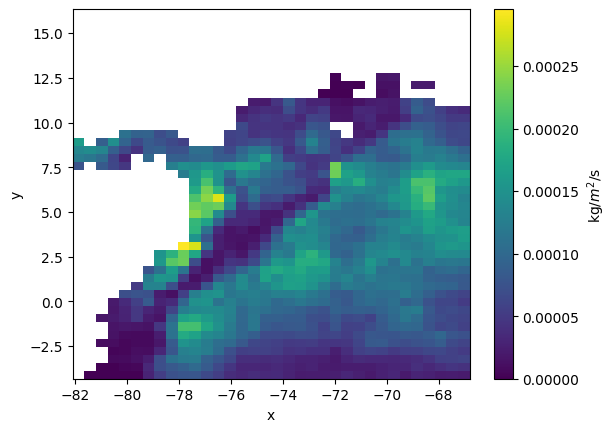

In [ ]:
# Imagen real de la variable y (precipitación)
precipitacion.clip(0,0.0003).band[6].where(precipitacion.band[6] != -9999).plot(cbar_kwargs={'label':'kg/$m^2$/s'})

In [ ]:
# Realizar predicción
pred_prec = BETA_1*evaporacion.band[6] + BETA_0

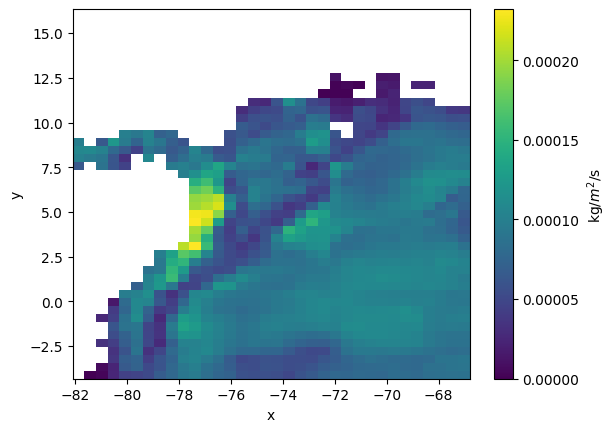

In [ ]:
# Imagen predicha
pred_prec['band'].clip(0,0.0003).where(precipitacion.band[6] != -9999).plot(cbar_kwargs={'label':'kg/$m^2$/s'})

In [ ]:
ERRORES_MODEL_PREC_EVAP = precipitacion.band[6] - pred_prec['band']

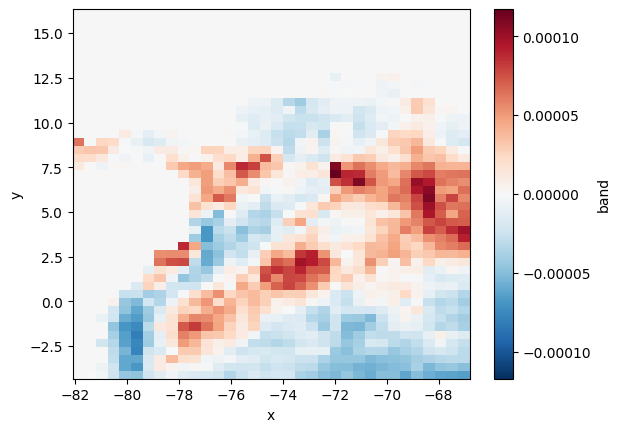

In [ ]:
ERRORES_MODEL_PREC_EVAP.plot()

## **2.3. MODELO RLS N°2 - imagénes individuales**

In [ ]:
df_modelo = pd.DataFrame({'precipitaciones': df_prec['precipitaciones'].values, 'evaporacion': df_evap['evaporacion'].values})
df_modelo

,precipitaciones,evaporacion
0,-9999.000000,-9999.000000
1,-9999.000000,-9999.000000
2,-9999.000000,-9999.000000
3,-9999.000000,-9999.000000
4,-9999.000000,-9999.000000
...,...,...
1559,0.000135,0.000050
1560,0.000157,0.000047
1561,0.000160,0.000046
1562,0.000145,0.000045


In [ ]:
df_modelo = df_modelo[df_modelo['precipitaciones'] != -9999 ]
df_modelo = df_modelo[df_modelo['evaporacion'] != -9999 ]

In [ ]:
df_modelo

,precipitaciones,evaporacion
328,0.000003,0.000009
329,0.000006,0.000011
330,0.000004,0.000010
332,0.000013,0.000017
333,0.000010,0.000021
...,...,...
1559,0.000135,0.000050
1560,0.000157,0.000047
1561,0.000160,0.000046
1562,0.000145,0.000045


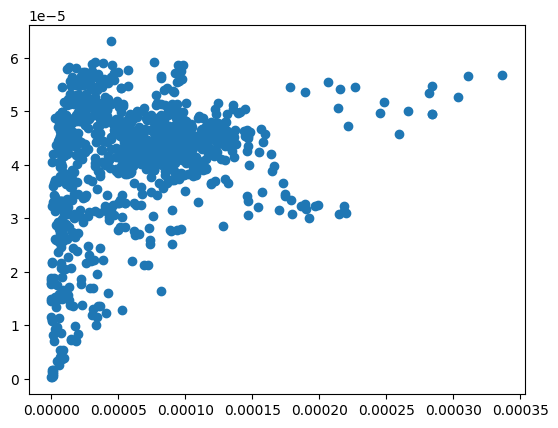

In [ ]:
plt.scatter(df_modelo.precipitaciones, df_modelo.evaporacion)

In [ ]:
y_mean = df_modelo['precipitaciones'].mean()
x_mean = df_modelo['evaporacion'].mean()

In [ ]:
xy_mean = (df_modelo['precipitaciones']*df_modelo['evaporacion']).mean()

In [ ]:
x2_mean = (df_modelo['evaporacion']**2).mean()

In [ ]:
x_mean2 = x_mean**2

In [ ]:
beta_0 = (x2_mean*y_mean - xy_mean*x_mean)/(x2_mean - x_mean2)
beta_1 = (xy_mean-x_mean*y_mean)/(x2_mean - x_mean2)

In [ ]:
# Probemos el modelo
pred_prec_2 = beta_1*df_modelo['evaporacion'] + beta_0

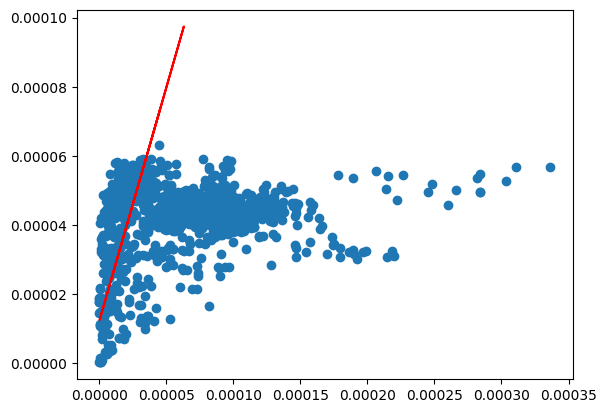

In [ ]:
plt.scatter(df_modelo.precipitaciones, df_modelo.evaporacion)
plt.plot(df_modelo['evaporacion'], pred_prec_2, color='red')

# **3. REGRESIÓN LINEAL MÚLTIPLE**

$\textbf{Y} =\textbf{X} \beta + ɛ$

$\hat \beta =\left( \textbf{X}^t \textbf{X}\right)^{-1} \textbf{X}^t \textbf{Y}$

$Humedad Suelo= \beta_0 + \beta_1*Precipitacion + \beta_2*Evaporacion+ \beta_3*HumedadEsp$

In [ ]:
# Arreglar la matriz de precipitaciones en 1 columna y 1564 filas. 492 tiempos (meses)
try:
  precipitacion_np = precipitacion.band.values.reshape(492, 1564, 1)
  print(f"Redimensionar el arreglo: {precipitacion_np.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revisar las dimensiones de su xarray 'precipitacion' objecto.")
precipitacion_np[0,:,:]

Redimensionar el arreglo: (492, 1564, 1)


array([[-9.9990000e+03],
       [-9.9990000e+03],
       [-9.9990000e+03],
       ...,
       [ 5.9665799e-05],
       [ 5.5059754e-05],
       [ 4.7730959e-05]], dtype=float32)

In [ ]:
# Arreglar la matriz de evaporaciones en 1 columna y 1564 filas. 492 tiempos (meses)
try:
  evaporacion_np = evaporacion.band.values.reshape(492, 1564, 1)
  print(f"Redimensionar el arreglo: {evaporacion_np.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revisar las dimensiones de su xarray 'evaporación' objecto.")
evaporacion_np[0,:,:]

Redimensionar el arreglo: (492, 1564, 1)


array([[-9.9990000e+03],
       [-9.9990000e+03],
       [-9.9990000e+03],
       ...,
       [ 5.1652911e-05],
       [ 5.1485484e-05],
       [ 5.0463674e-05]], dtype=float32)

In [ ]:
# Arreglar la matriz de humedades especificas en 1 columna y 1564 filas. 492 tiempos (meses)
try:
  humedadEspecifica_np = humedadEspecifica.band.values.reshape(492, 1564, 1)
  print(f"Redimensionar el arreglo: {humedadEspecifica_np.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revisar las dimensiones de su xarray 'humedad especifica' objecto.")
humedadEspecifica_np[0,:,:]

Redimensionar el arreglo: (492, 1564, 1)


array([[-9.9990000e+03],
       [-9.9990000e+03],
       [-9.9990000e+03],
       ...,
       [ 1.8866882e-02],
       [ 1.8865924e-02],
       [ 1.8871512e-02]], dtype=float32)

In [ ]:
# Crear matrix de 1s para estimar el Beta_0

ones_array = np.ones((492, 1564, 1))
ones_array[0,:,:]

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
# Crear matriz X

try:
  X_matriz = np.concatenate((ones_array, precipitacion_np,evaporacion_np,humedadEspecifica_np), axis=2)
  print(f"Nuevo arreglo: {X_matriz.shape}")
except ValueError as e:
  print(f"Error: No se pudo concatenar el arreglo. {e}")
  print("Revise las dimensiones de su arreglo.")
X_matriz[0,:,:]

Nuevo arreglo: (492, 1564, 4)


array([[ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       [ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       [ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       ...,
       [ 1.00000000e+00,  5.96657992e-05,  5.16529108e-05,
         1.88668817e-02],
       [ 1.00000000e+00,  5.50597542e-05,  5.14854837e-05,
         1.88659243e-02],
       [ 1.00000000e+00,  4.77309586e-05,  5.04636737e-05,
         1.88715123e-02]])

In [ ]:
# pasar de 3 a 2 dimensiones
try:
  X_matriz_2d = X_matriz.reshape(492 * 1564, 4)
  print(f"Arreglo redimensionado: {X_matriz_2d.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revise las dimensiones de su arreglo.")

Arreglo redimensionado: (769488, 4)


In [ ]:
X_matriz_2d

array([[ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       [ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       [ 1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
        -9.99900000e+03],
       ...,
       [ 1.00000000e+00,  1.59786199e-04,  4.57281385e-05,
         1.96865890e-02],
       [ 1.00000000e+00,  1.44760706e-04,  4.54184956e-05,
         1.97185613e-02],
       [ 1.00000000e+00,  1.23645732e-04,  4.52778877e-05,
         1.95861459e-02]])

In [ ]:
# Arreglar la matriz de humedades del suelo en 1 columna y 1564 filas. 492 tiempos (meses)
try:
  suelo_np = suelo.band.values.reshape(492, 1564, 1)
  print(f"Redimensionar el arreglo: {suelo_np.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revisar las dimensiones de su xarray 'evaporación' objecto.")
suelo_np[0,:,:]

Redimensionar el arreglo: (492, 1564, 1)


array([[-9.999000e+03],
       [-9.999000e+03],
       [-9.999000e+03],
       ...,
       [ 4.220913e-01],
       [ 4.209287e-01],
       [ 4.190694e-01]], dtype=float32)

In [ ]:
# pasar de 3 a 2 dimensiones
try:
  Y_matriz_2d = suelo_np.reshape(492 * 1564, 1)
  print(f"Arreglo redimensionado: {Y_matriz_2d.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revise las dimensiones de su arreglo.")

Arreglo redimensionado: (769488, 1)


In [ ]:
XtX = np.dot(np.transpose(X_matriz_2d), X_matriz_2d)

In [ ]:
XtX_inv = np.linalg.inv(XtX)

In [ ]:
XtY = np.dot(np.transpose(X_matriz_2d), Y_matriz_2d)

In [ ]:
Beta_valores = np.dot(XtX_inv, XtY)
Beta_valores

array([[-21.83792067],
       [-12.33729371],
       [  1.00003938],
       [ 12.33544559]])

### Modelo: $HumedadSuelo = -21.83792067 - 12.33729371*Precipitacion + 1.00003938* Evaporacion + 12.33544559*HumedadEsp$

## **PROBAR MODELO DE RLM**

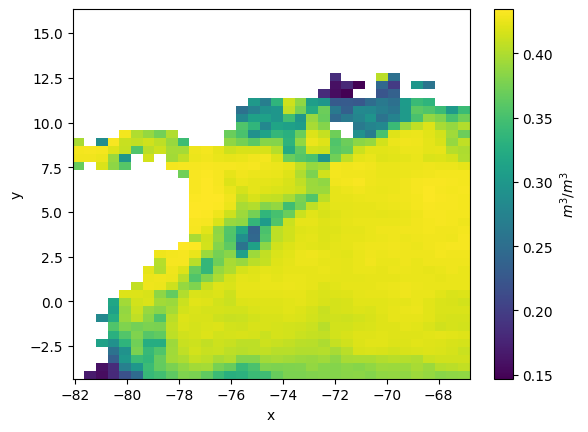

In [ ]:
# Imagen real de la variable y (humedad del suelo)
suelo.clip(0,1).band[6].where(suelo.band[6] != -9999).plot(cbar_kwargs={'label':'$m^3$/$m^3$'})

In [ ]:
# Realizar predicción
pred_HS = Beta_valores[0]+ Beta_valores[1]*precipitacion.band[6]+ Beta_valores[2]*evaporacion.band[6] + Beta_valores[3]*humedadEspecifica.band[6]

In [ ]:
pred_HS

<xarray.DataArray 'band' (y: 46, x: 34)> Size: 13kB
array([[-10002.75220584, -10002.75220584, -10002.75220584, ...,
        -10002.75220584, -10002.75220584, -10002.75220584],
       [-10002.75220584, -10002.75220584, -10002.75220584, ...,
        -10002.75220584, -10002.75220584, -10002.75220584],
       [-10002.75220584, -10002.75220584, -10002.75220584, ...,
        -10002.75220584, -10002.75220584, -10002.75220584],
       ...,
       [-10002.75220584, -10002.75220584, -10002.75220584, ...,
           -21.62261574,    -21.61899477,    -21.6185901 ],
       [-10002.75220584, -10002.75220584,    -21.66863311, ...,
           -21.62028075,    -21.61788236,    -21.61848755],
       [-10002.75220584,    -21.66595144,    -21.6747217 , ...,
           -21.61902399,    -21.61858227,    -21.61908833]])
Coordinates:
    x        (y, x) float64 13kB -81.86 -81.41 -80.96 ... -67.94 -67.49 -67.04
    y        (y, x) float64 13kB 16.11 16.11 16.11 ... -4.099 -4.099 -4.099

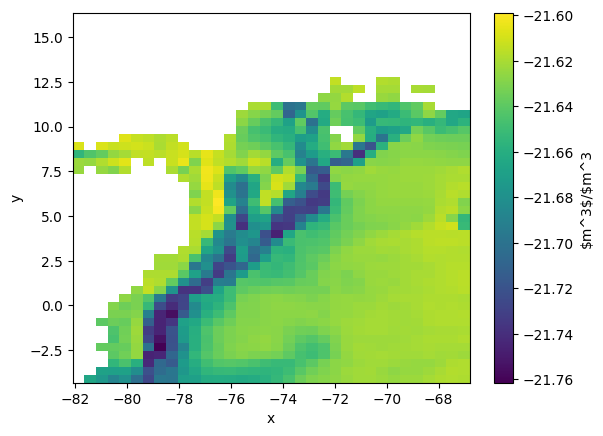

In [ ]:
# Imagen predicha
pred_HS.where(suelo.band[6] != -9999).plot(cbar_kwargs={'label':'$m^3$/$m^3'})

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [ ]:
try:
  Xx_matriz = np.concatenate((precipitacion_np,evaporacion_np,humedadEspecifica_np), axis=2)
  print(f"Nuevo arreglo: {Xx_matriz.shape}")
except ValueError as e:
  print(f"Error: No se pudo concatenar el arreglo. {e}")
  print("Revise las dimensiones de su arreglo.")
Xx_matriz[0,:,:]

Nuevo arreglo: (492, 1564, 3)


array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       ...,
       [ 5.9665799e-05,  5.1652911e-05,  1.8866882e-02],
       [ 5.5059754e-05,  5.1485484e-05,  1.8865924e-02],
       [ 4.7730959e-05,  5.0463674e-05,  1.8871512e-02]], dtype=float32)

In [ ]:
# pasar de 3 a 2 dimensiones
try:
  Xx_matriz_2d = Xx_matriz.reshape(492 * 1564, 3)
  print(f"Arreglo redimensionado: {Xx_matriz_2d.shape}")
except ValueError as e:
  print(f"Error: No se pudo redimensionar el arreglo. {e}")
  print("Revise las dimensiones de su arreglo.")

Arreglo redimensionado: (769488, 3)


In [ ]:
reg.fit(Xx_matriz_2d, Y_matriz_2d)
reg.coef_

array([[0.33333984, 0.3333236 , 0.33334085]], dtype=float32)

In [ ]:
reg.intercept_

array([-6.498047], dtype=float32)

In [ ]:
# Realizar predicción 2
pred_HS2 = -6.498047+ 0.33333984*precipitacion.band[6]+ 0.3333236*evaporacion.band[6] +  0.33334085*humedadEspecifica.band[6]

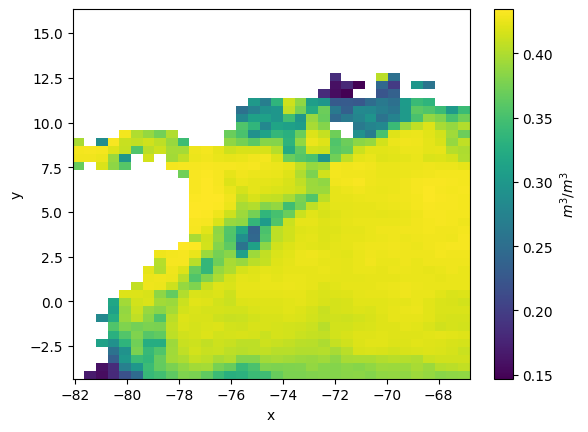

In [ ]:
# Imagen real de la variable y (humedad del suelo)
suelo.clip(0,1).band[6].where(suelo.band[6] != -9999).plot(cbar_kwargs={'label':'$m^3$/$m^3$'})

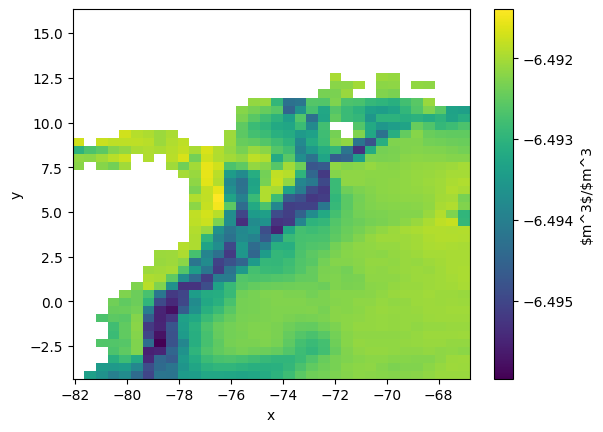

In [ ]:
# Imagen predicha
pred_HS2.where(suelo.band[6] != -9999).plot(cbar_kwargs={'label':'$m^3$/$m^3'})

In [ ]:
from sklearn.metrics import r2_score

# pred_HS2 y suelo.band[6] son los valores predichos y reales
# Tienen las mismas dimensiones

# Aplanar los arreglos para el cálculo de R2
y_true = suelo.band[6].values.flatten()
y_pred = pred_HS2.values.flatten()

# Remover NaN y valores infinitos para realizar el test
valid_indices = np.isfinite(y_true) & np.isfinite(y_pred)
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]


r2 = r2_score(y_true, y_pred)

print(f"R-cuadrado del modelo pred_HS2: {r2}")

R-cuadrado del modelo pred_HS2: 0.9999980926513672


In [ ]:
pp= pred_HS2.where(suelo.band[6] != -9999).values.flatten()

ii= np.isfinite(pp)

ip = pp[ii]

ip.min(), ip.max()

(np.float32(-6.4959645), np.float32(-6.4913926))

In [ ]:
rr= suelo.band[6].where(suelo.band[6] != -9999).values.flatten()

jj= np.isfinite(rr)

ir = rr[jj]

ir.min(), ir.max()

(np.float32(0.14682841), np.float32(0.4344824))

In [ ]:
r2 = r2_score(ir, ip)

print(f"R-cuadrado del modelo pred_HS2: {r2}")

R-cuadrado del modelo pred_HS2: -18803.6484375
